<a href="https://colab.research.google.com/github/Uchiha67/Prediction-of-HTC-using-nanofluids/blob/main/KNN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import time
import tensorflow as tf
from scipy.io import FortranFile
import random
import pandas as pd
# Import PyTorch libraries
import torch
from torch import nn

# Import visualization library
import matplotlib.pyplot as plt
import seaborn as sns
# Verify PyTorch version
torch.__version__

'2.0.1+cu118'

In [ ]:
# Check to see if we have a GPU to use for training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('A {} device was detected.'.format(device))

# Print the name of the cuda device, if detected
if device=='cuda':
    print (torch.cuda.get_device_name(device=device))

A cpu device was detected.


In [ ]:
df = pd.read_excel('FINAL SHEET.xlsx', sheet_name='Database')

# Explore the first 10 rows of the dataset
df.head(10)

,Base Fluid,Nano Particle,Mass Fraction,Reynold No.,Density of nanofluid (kg/m3),Specific heat-nano fluid ( J/kg K),Thermal conductivity-nanofluid(W/mK),Dynamic viscocity- nanofluid (Kg/m3),Heat Transfer Coefficient ( W/m2K),Source
0,EG/water (60:40),Aluminium oxide(AL2O3),0.02,8783.31970,1125.361821,51.749852,0.407062,3.305239,5157.85548,Development of new correlations for convective...
1,EG/water (60:40),Aluminium oxide(AL2O3),0.02,9068.43394,1126.321689,51.699119,0.405898,3.469004,5386.48670,Development of new correlations for convective...
2,EG/water (60:40),Aluminium oxide(AL2O3),0.02,9502.58516,1127.473481,51.638214,0.404448,3.682849,5694.79243,Development of new correlations for convective...
3,EG/water (60:40),Aluminium oxide(AL2O3),0.02,9858.97795,1128.604730,51.578358,0.402965,3.913629,6041.20337,Development of new correlations for convective...
4,EG/water (60:40),Aluminium oxide(AL2O3),0.02,10001.53506,1129.272011,51.543029,0.402062,4.060538,6269.83459,Development of new correlations for convective...
5,EG/water (60:40),Aluminium oxide(AL2O3),0.02,10435.68628,1129.893939,51.510085,0.401199,4.205375,6501.92992,Development of new correlations for convective...
6,EG/water (60:40),Aluminium oxide(AL2O3),0.02,10792.07907,1130.458271,51.480176,0.400399,4.343913,6730.56113,Development of new correlations for convective...
7,EG/water (60:40),Aluminium oxide(AL2O3),0.02,11077.19331,1131.152680,51.443351,0.399391,4.524415,7038.86687,Development of new correlations for convective...
8,EG/water (60:40),Aluminium oxide(AL2O3),0.02,11368.78741,1131.547908,51.422380,0.398806,4.632445,7229.39288,Development of new correlations for convective...
9,EG/water (60:40),Aluminium oxide(AL2O3),0.02,11582.62308,1131.926505,51.402282,0.398236,4.739760,7423.38301,Development of new correlations for convective...


<ipython-input-4-d8e06a312c28>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


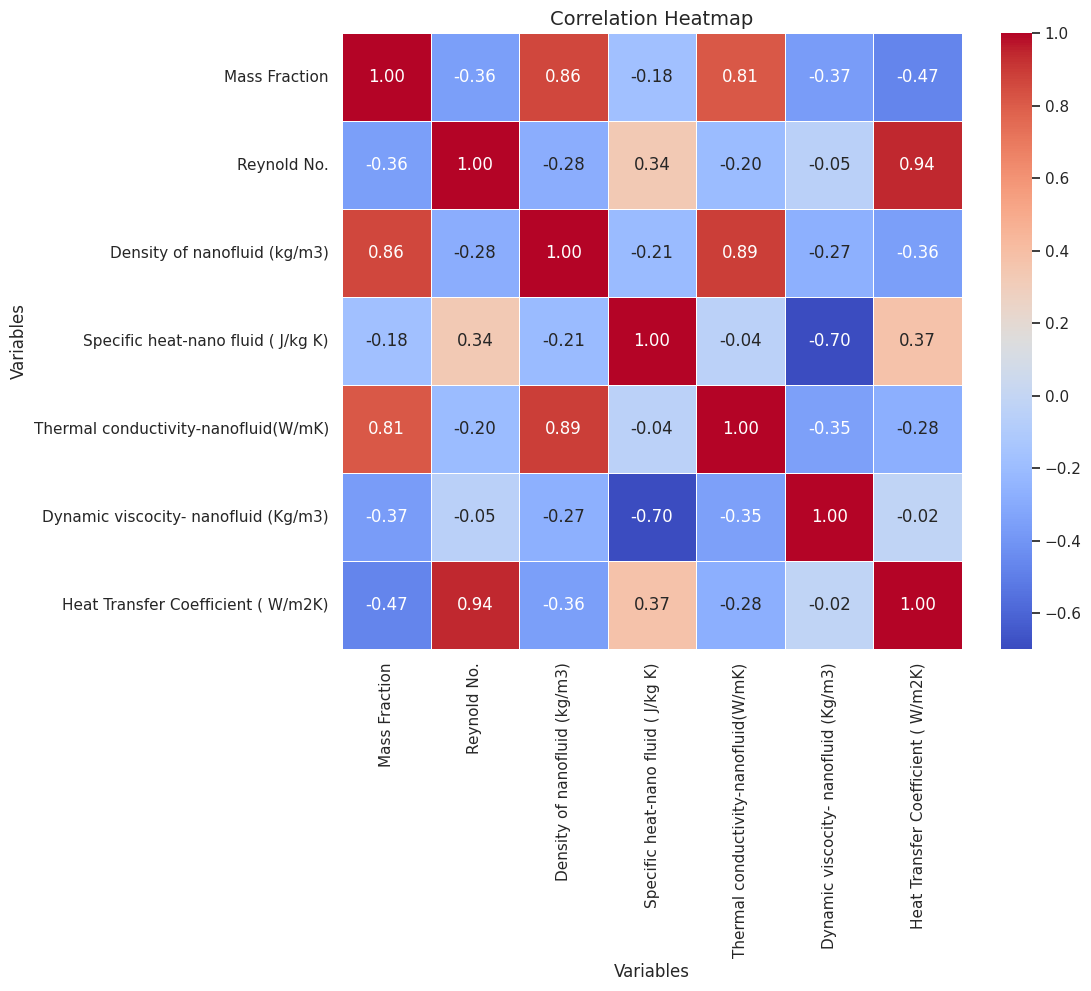

In [ ]:
import seaborn as sns
import pandas as pd

# Assuming you have a DataFrame named "df" containing your data

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
sns.set(style='white')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title and axis labels
plt.title('Correlation Heatmap', fontsize=14)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# Show the heatmap
plt.show()

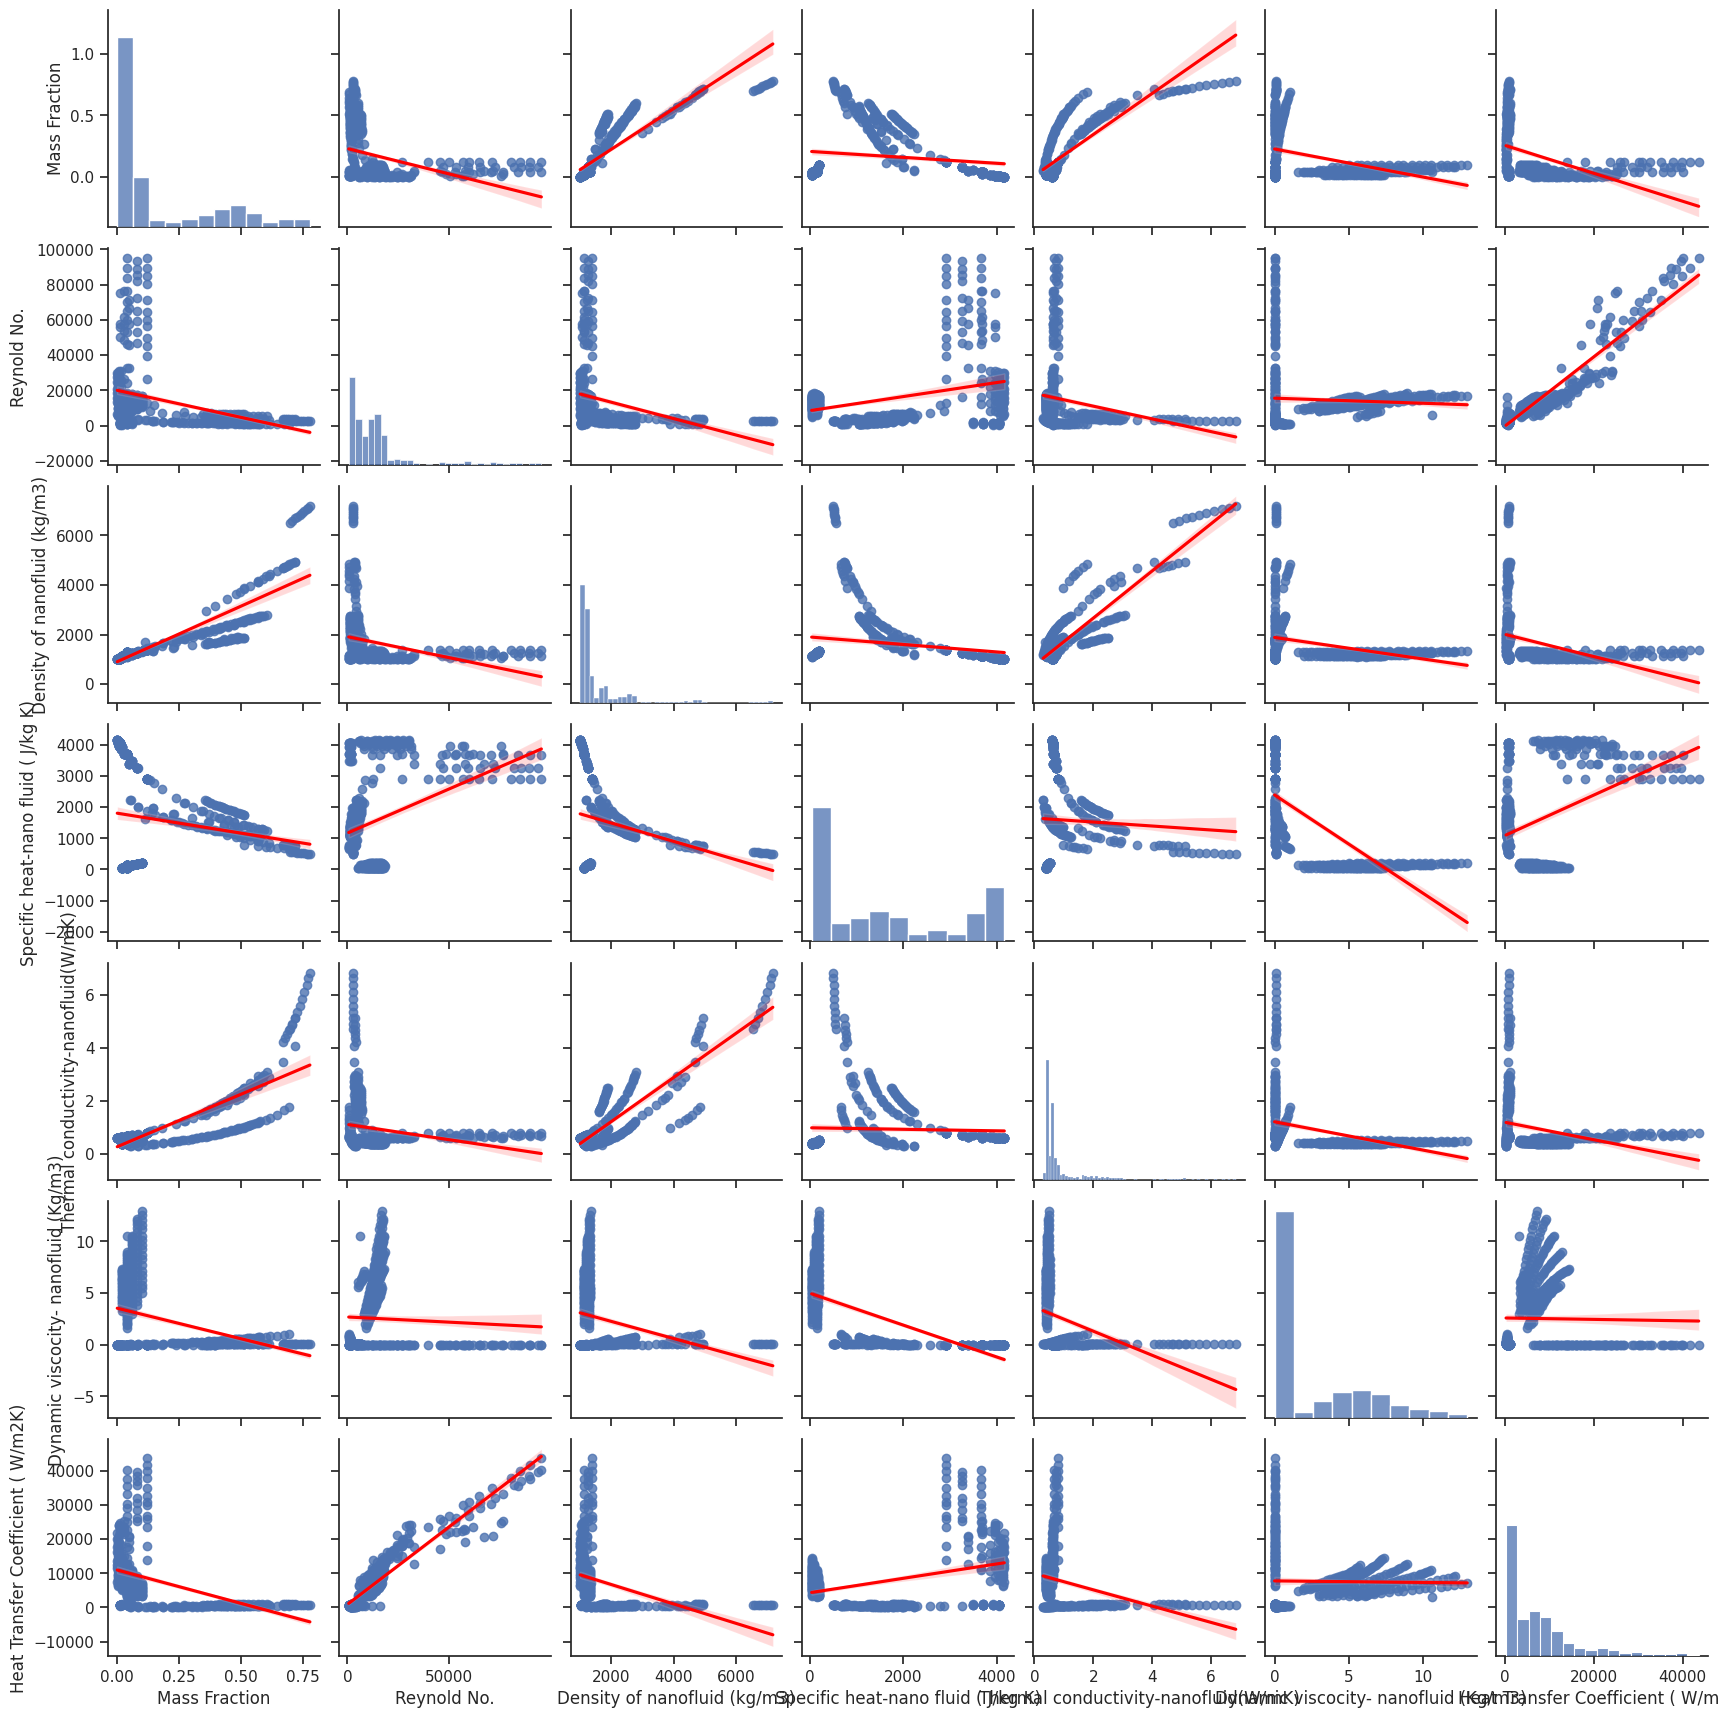

In [ ]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [ ]:
data=pd.get_dummies(df, columns=["Base Fluid", "Nano Particle"], prefix=["Base_fluid_en", "Nano_particle_en"])

In [ ]:
data = data.drop('Source', axis=1)

In [ ]:
data.head()

,Mass Fraction,Reynold No.,Density of nanofluid (kg/m3),Specific heat-nano fluid ( J/kg K),Thermal conductivity-nanofluid(W/mK),Dynamic viscocity- nanofluid (Kg/m3),Heat Transfer Coefficient ( W/m2K),Base_fluid_en_EG/water (60:40),Base_fluid_en_Ethylene Glycol,Base_fluid_en_Water,Nano_particle_en_(SIO2),Nano_particle_en_Aluminium,Nano_particle_en_Aluminium Oxide,Nano_particle_en_Aluminium oxide(AL2O3),Nano_particle_en_Copper,Nano_particle_en_Copper Oxide,Nano_particle_en_Titanium Dioxide,Nano_particle_en_Zirconium Dioxide
0,0.02,8783.31970,1125.361821,51.749852,0.407062,3.305239,5157.85548,1,0,0,0,0,0,1,0,0,0,0
1,0.02,9068.43394,1126.321689,51.699119,0.405898,3.469004,5386.48670,1,0,0,0,0,0,1,0,0,0,0
2,0.02,9502.58516,1127.473481,51.638214,0.404448,3.682849,5694.79243,1,0,0,0,0,0,1,0,0,0,0
3,0.02,9858.97795,1128.604730,51.578358,0.402965,3.913629,6041.20337,1,0,0,0,0,0,1,0,0,0,0
4,0.02,10001.53506,1129.272011,51.543029,0.402062,4.060538,6269.83459,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Check the size/shape of our dataset
data.shape

(472, 18)

In [ ]:
# Importing the library
import sklearn
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()

# transform data
scaled_data = scaler.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data,index=data.index,columns=data.columns)

In [ ]:
scaled_data.shape

(472, 18)

In [ ]:
scaled_data.head(10)

,Mass Fraction,Reynold No.,Density of nanofluid (kg/m3),Specific heat-nano fluid ( J/kg K),Thermal conductivity-nanofluid(W/mK),Dynamic viscocity- nanofluid (Kg/m3),Heat Transfer Coefficient ( W/m2K),Base_fluid_en_EG/water (60:40),Base_fluid_en_Ethylene Glycol,Base_fluid_en_Water,Nano_particle_en_(SIO2),Nano_particle_en_Aluminium,Nano_particle_en_Aluminium Oxide,Nano_particle_en_Aluminium oxide(AL2O3),Nano_particle_en_Copper,Nano_particle_en_Copper Oxide,Nano_particle_en_Titanium Dioxide,Nano_particle_en_Zirconium Dioxide
0,-0.708876,-0.333448,-0.488472,-1.000864,-0.524285,0.225596,-0.286052,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317
1,-0.708876,-0.317786,-0.487599,-1.000897,-0.525417,0.273784,-0.259957,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317
2,-0.708876,-0.293936,-0.486552,-1.000936,-0.526827,0.336708,-0.224767,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317
3,-0.708876,-0.274358,-0.485524,-1.000975,-0.528268,0.404615,-0.185228,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317
4,-0.708876,-0.266527,-0.484917,-1.000998,-0.529147,0.447843,-0.159132,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317
5,-0.708876,-0.242677,-0.484352,-1.001020,-0.529985,0.490462,-0.132641,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317
6,-0.708876,-0.223099,-0.483839,-1.001039,-0.530763,0.531227,-0.106545,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317
7,-0.708876,-0.207436,-0.483207,-1.001063,-0.531743,0.584340,-0.071356,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317
8,-0.708876,-0.191418,-0.482848,-1.001077,-0.532313,0.616127,-0.049609,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317
9,-0.708876,-0.179671,-0.482504,-1.001090,-0.532866,0.647705,-0.027468,1.240014,-0.403189,-0.934353,-0.241446,-0.30429,-0.53161,1.630618,-0.147122,-0.557773,-0.283004,-0.187317


In [ ]:
 # First dataframe with 80% of the rows
train= scaled_data.sample(frac=0.8, random_state=1) 
 # Second dataframe with the remaining rows
test = scaled_data.drop(train.index)

In [ ]:
train.shape

(378, 18)

In [ ]:
## Create training and test file
from sklearn.model_selection import train_test_split

X = train.iloc[:,1:].values
y = train.loc[:,'Heat Transfer Coefficient ( W/m2K)'].values
X[:] = np.nan_to_num(X)
y[:] = np.nan_to_num(y)


In [ ]:
X.shape

(378, 17)

In [ ]:
y.shape

(378,)

In [ ]:
X_val = test.iloc[:,1:].values
y_val = test.loc[:,'Heat Transfer Coefficient ( W/m2K)'].values

X_val[:] = np.nan_to_num(X_val)
y_val[:] = np.nan_to_num(y_val)

In [ ]:
X_val.shape

(94, 17)

In [ ]:
y_val.shape

(94,)

In [ ]:
import math
import itertools
import warnings
warnings.filterwarnings('ignore')



from sklearn import model_selection, metrics
from sklearn.model_selection import train_test_split
from scipy import stats


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, r2_score, f1_score,mean_squared_error

from sklearn.neural_network import MLPRegressor


from numpy.random import seed
seed(1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
def complete_model(trainX, trainy, testX, testy, model):
    model.fit(trainX, trainy)
    y_pred = model.predict(testX)
    return calculation(testy, y_pred)

In [ ]:
def calculation(y_test, y_pred):  
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=metrics.r2_score(y_test,y_pred)
    pcc=stats.pearsonr(y_test,y_pred)
    return [mse, rmse, r2, pcc[0],pcc[1]]

In [ ]:
def print_output(model_name, val, output_val):
    print('\033[1mOptimized {} model {} performance: \033[0m'.format(model_name, val))
    print("MSE:         {0:.3f}".format(output_val[0]))
    print("RMSE: {0:.3f}".format(output_val[1]))
    print("R2: {0:.3f}".format(output_val[2]))
    print("PCC:    {0:.3f}".format(output_val[3]))
    print("p-value:    {0:.3f}".format(output_val[4]))

In [ ]:
column_names =  ['Range_val', 'Model_info','MAE', 'RMSE','R2', 'PCC','p-val']

In [ ]:
### define a dataframe to save the training performance
output  = pd.DataFrame(columns = column_names)

for k in [3,5,7,9,11]:  
    model = KNeighborsRegressor(n_neighbors=k)
    print(model)
    
    for j in range(100):    
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=j)
        output_val = complete_model(trainX=X_train, trainy=y_train, testX=X_test, testy=y_test, model=model)
        output.loc[len(output)] = [str(j), 'knn_k'+str(k),output_val[0], output_val[1], output_val[2], output_val[3],  output_val[4]]

output.to_csv(r'''knn_training_metrics_all.csv''')
KNeighborsRegressor(n_neighbors=3)
KNeighborsRegressor()
KNeighborsRegressor(n_neighbors=7)
KNeighborsRegressor(n_neighbors=9)
KNeighborsRegressor(n_neighbors=11)

KNeighborsRegressor(n_neighbors=3)
KNeighborsRegressor()
KNeighborsRegressor(n_neighbors=7)
KNeighborsRegressor(n_neighbors=9)
KNeighborsRegressor(n_neighbors=11)


KNeighborsRegressor(n_neighbors=11)

In [ ]:
### KNN
optimized_knn = KNeighborsRegressor(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=51)
### Optimized KNN model training performance
print_output('KNN', 'training', complete_model(X_train, y_train, X_test, y_test, optimized_knn))
### Optimized KNN model testing performance
print_output('KNN', 'testing', complete_model(X_train, y_train, X_val, y_val, optimized_knn))

Optimized KNN model training performance: 
MSE:         0.007
RMSE: 0.082
R2: 0.994
PCC:    0.997
p-value:    0.000
Optimized KNN model testing performance: 
MSE:         0.004
RMSE: 0.064
R2: 0.996
PCC:    0.998
p-value:    0.000


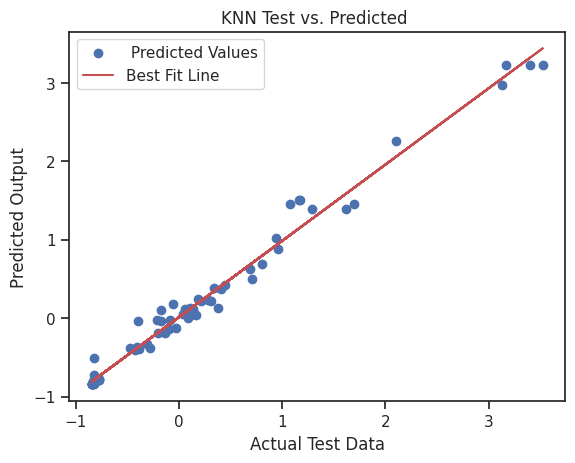

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# assume model is the trained ANN and y_test is the actual test data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot the predicted values against the actual test data
slope, intercept = np.polyfit(y_test, y_pred, 1)

# plot the predicted values against the actual test data
plt.scatter(y_test, y_pred,label=' Predicted Values' )
plt.plot(y_test, slope*y_test + intercept, color='r', label='Best Fit Line')
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Output")
plt.title("KNN Test vs. Predicted ")
plt.legend()
plt.show()

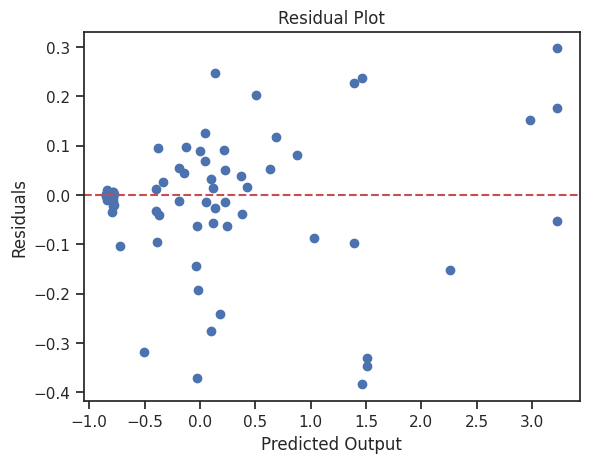

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# assume model is the trained ANN and y_test is the actual test data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Plotting the residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Output")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()